In [2]:
!pip install librosa

   ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
   ----------------- ---------------------- 112.6/253.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 253.7/253.7 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 19.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/222.8 kB ? eta -:--:--
   ---------------------------------------- 222.8/222.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------- ----------------------------- 0.7/2.6 MB 20.5 MB/s eta 0:00:01
   -------------------------------------- - 2.5/2.6 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 27.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
   ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
   ------------------------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Processing folder: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P
Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P\300_AUDIO.wav


C:\Users\herna\AppData\Local\Temp\ipykernel_12964\558947945.py:27: WavFileWarning: Reached EOF prematurely; finished at 20752044 bytes, expected 166016044 bytes from header.
  sampling_rate, audio_signal = wavfile.read(file_path)


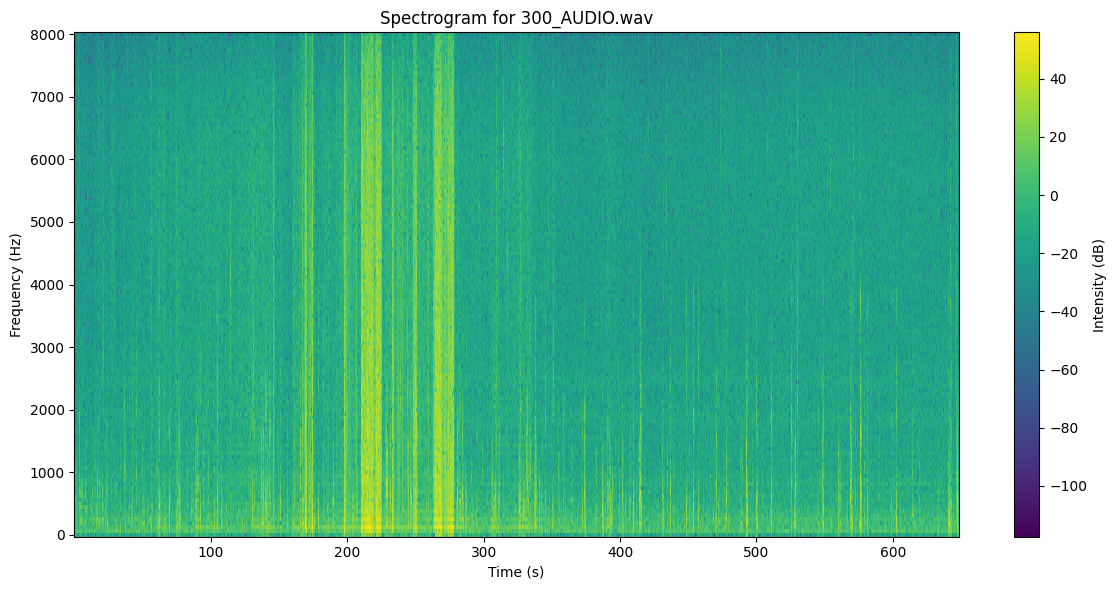

Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P\preprocessed_300_AUDIO.wav


d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\Recreating paper\Preprocessing\.venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 0, using nperseg = 0
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: not enough values to unpack (expected 2, got 1)

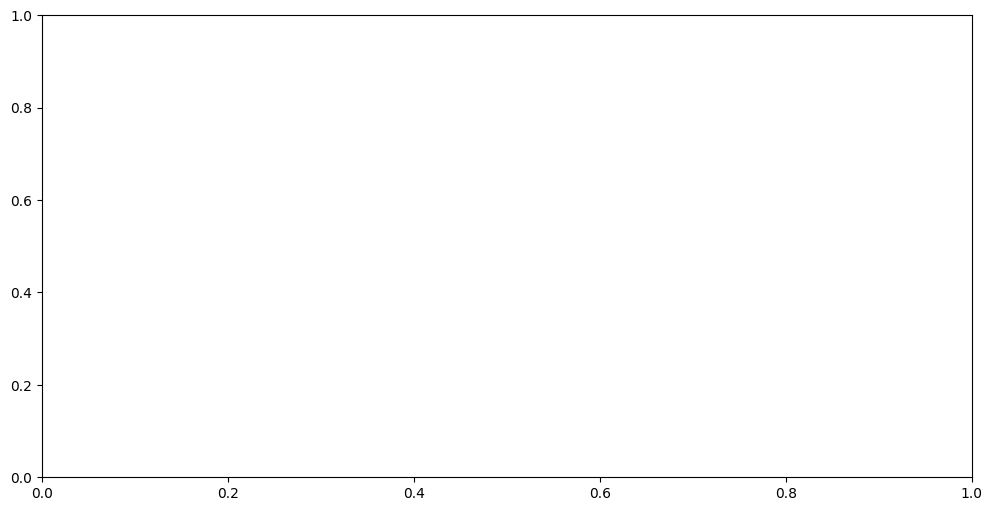

In [1]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Specify the path to the main folder containing subfolders with .wav files
main_folder_path = "d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data"

# Iterate through each folder in the main folder
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")

        # Iterate through each file in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if it's a .wav file
            if file_name.lower().endswith('.wav'):
                print(f"Processing file: {file_path}")

                # Load .wav file
                sampling_rate, audio_signal = wavfile.read(file_path)

                # Calculate spectrogram
                frequencies, times, spectrogram_data = spectrogram(audio_signal, fs=sampling_rate)

                # Plot spectrogram
                plt.figure(figsize=(12, 6))
                plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')
                plt.title(f"Spectrogram for {file_name}")
                plt.xlabel('Time (s)')
                plt.ylabel('Frequency (Hz)')
                plt.colorbar(label='Intensity (dB)')
                plt.tight_layout()
                plt.show()
